# Ch09 딥러닝을 이용한 주가 예측
## 9.1 인공지능
artificial intelligence
### 9.1.1 인공지능 기술의 분류
인공지능 1950 - 체커 게임을 프로그램으로 개발,\
머신러닝 1980 - 스팸 이메일 필터링처럼 실생활에 적용 가능한 기술,\
딥러닝 2010 - 단순히 고양이와 개를 구별하는 수준을 넘어서 MRI 스캔으로 암을 진단하는 수준
### 9.1.2 머신러닝
### 9.1.3 퍼셉트론 알고리즘
Frank Rosenblantt 1957 perceptron algorithm: neural network algorithm\
perceptron은 여러 입력 신호(x1, x2)에 대하여 각각 고유한 가중치(w1, w2)를 지니고 있다. 입력받은 신호의 총합(x1w1+x2w2)이 임계값(theta) 이하일 때는 0을 출력하지만 입력받은 신호의 총합이 임계값(theta)을 넘어설 때 1을 출력하는데, 이를 활성화한다.(activate)라고 표현한다. perceptron은 구조를 변경하지 않으면서 매개변수(가중치와 임계값)만 변경함으로써 AND, NAND, OR 세가지의 논리회로를 만들 수 있다. perceptron 하나로는 절대로 만들 수 없는 XOR 논리회로도 perceptron을 여러 층으로 쌓은 다층 perceptron을 이용하면 만들 수 있다.

In [4]:
def AND(x1, x2):
    w1=0.5
    w2=0.5
    theta=0.7
    if w1*x1+w2*x2>theta:
        return 1
    else:
        return 0

print(AND(1,1))

1


In [9]:
def AND(x1, x2):
    w1=0.5
    w2=0.5
    theta=0.7
    if w1*x1+w2*x2>theta:
        return 1
    else:
        return 0

def NAND(x1, x2):
    w1=-0.5
    w2=-0.5
    theta=-0.7
    if w1*x1+w2*x2>theta:
        return 1
    else:
        return 0

def OR(x1, x2):
    w1=0.5
    w2=0.5
    theta=0.2
    if w1*x1+w2*x2>theta:
        return 1
    else:
        return 0

def XOR(x1, x2):
    return AND(NAND(x1,x2), OR(x1,x2))

print(AND(0,1))
print(NAND(0,1))
print(OR(0,1))
print(XOR(0,1))

0
1
1
1


perceptron은 입력 신호마다 다른 가중치를 부여하여 처리하며, 입력신호의 합이 일정값을 초과하면, 그 결과를 다른 perceptron으로 전달한다.\
신경세포와 매우 유사한 perceptron의 이러한 동작은 작은 인공 신경망의 연구의 시발점이 되었다. 다층 퍼셉트론을 이용하면 컴퓨터도 만들어 낼 수 있는 것으로 알려져 있다. 
### 9.1.4 활성화 함수
입력 신호의 총합이 임계값을 넘어 설 때 특정값을 출력하는 함수를 활성화 함수 activation function 라고 한다. 출력신호가 계단모양을 닯은 계단함수, 출력신호가 S자를 닮은 시그모이드 함수, 시그모이드 함수를 대체해 사용하는 ReLU 함수 등 다양한 활성화 함수가 있다.
#### 계단 함수
step function

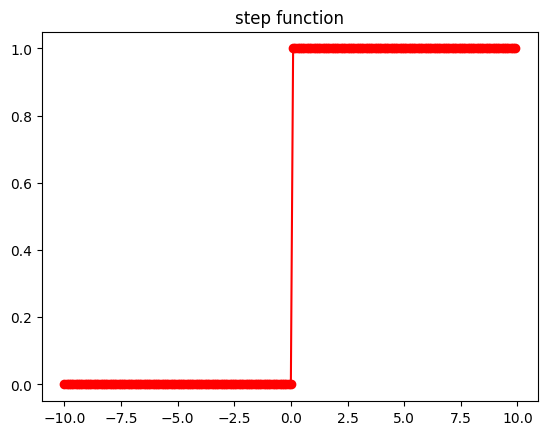

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def stepfunc(x):
    return np.where(x <= 0, 0, 1)

x = np.arange(-10, 10, 0.1)
y = stepfunc(x)

plt.plot(x, y, "ro-")
plt.title('step function')
plt.show()
#print(x)
#print(y)

#### 시그모이드 함수
sigmoid, 라틴문자 S를 닮았다는 의미를 가지고 있다. 그리스문자인 시그마가 라틴문자 S에 해당하기 때문에 sigma로 줄여서 표기하기도 한다.
$$y=\frac{1}{1+e^{-x}} $$
시르모이드 함수를 사용할 경우 0~1 사이의 연속적인 실수가 출력된다. perceptron의 활성화 함수를 계단함수에서 sigmoid함수로 변경해 비로소 복잡한 신경망에 대한 계산도 가능해졌다.

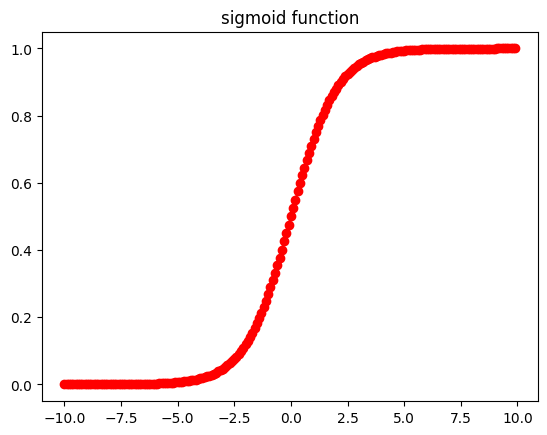

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)

plt.plot(x, y, "ro-")
plt.title('sigmoid function')
plt.show()
#print(x)
#print(y)

#### tanh 함수
쌍곡탄젠트 hyperbolic tangent 함수는 시르모이드 함수처럼 S자 모양의 그래프로 표시되지만, sigmoid는 0<y<1, tanh -1<y<1 출력한다.
$$y=\frac{e^x-e^{-x}}{e^x+e^{-x}} $$

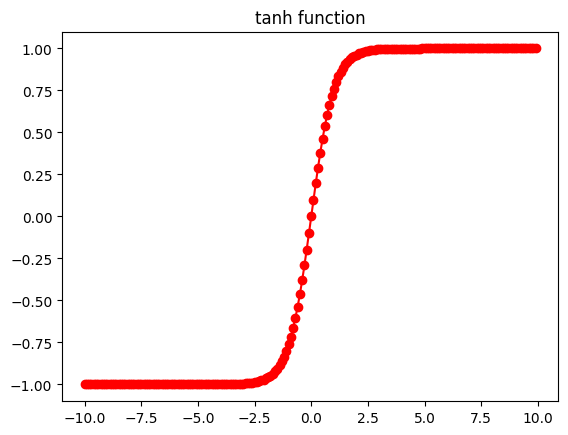

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))  

x = np.arange(-10, 10, 0.1) 
y = tanh(x) 

plt.plot(x, y, "ro-")
plt.title('tanh function')
plt.show()

#### ReLU 함수
최근 들어서 ReLU rectified linear unit함수가 주로 사용되고 있다. 음수는 0으로 만든다. \
np.maximum() 함수는 인수로 주어진 수 중에서 가장 큰 수를 반환한다. 따라서 x가 0보다 작거나 같을 때 0을 반환하고, x가 0보다 크면 x를 반환한다.

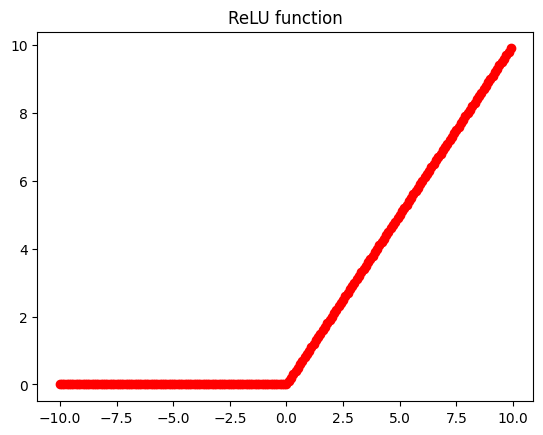

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-10, 10, 0.1)
y = relu(x)

plt.plot(x, y, "ro-")
plt.title('ReLU function')
plt.show()

#### softmax 함수
분류문제를 다룰 때 사용되는 활성화 함수로 입력받은 값들을 0~1 사이 값으로 정규화한다. \
출력값들의 총합은 항상 1이 된다. 입력값 x가 n개일 때 수식으로 나타난다.
$$ y=\frac{e^x}{\sum_{k=1}^{n} e^x k} $$
예제, n=3, x1=1, x2=1, x3=2

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))
s=softmax([1,1,2])
print(s)

[0.21194156 0.21194156 0.57611688]


### 9.1.5 다층 퍼셉트론
multi-layer perceptron: 단층 퍼셉트론에서는 불가능했던 비선형 문제를 해결할 수 있었고 XOR 게이트를 만들 수 있다.\
input layer 입력층 0층\
hidden layer 은닉층 1층\
ouput layer 출력층 2층\
은닉층이 무수히 많은 신경망을 심층 신경망이라고 부른다.\
은닉층의 첫 번째 퍼셉트론 $a_1^{(1)}$을 수식으로 나타내면
$$a_1^{(1)} = b_1^{(1)}+w_{11}^{(1)}x_1+w_{12}^{(1)}x_2 $$
입력층으로부터 은닉층의 세 개의 퍼셉트론까지 신호가 전달되는 과정을 행렬의 내적을 이용하여 나타낸 수식은 다음과 같다.
$$A^{(1)} = XW^{(1)}+B^{(1)} $$
$$ (a_1^{(1)}\ a_2^{(1)}\ a_3^{(1)}) = (x_1\ x_2)
\begin{pmatrix}
w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
\end{pmatrix}
+ (b_1^{(1)}\ b_2^{(1)}\ b_3^{(1)}) $$


In [41]:
import numpy as np
X = np.array([10, 20])  # ①
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([1, 2, 3])  # ③

def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print('A1 :', A1)
print('Z1 :', Z1)

A1 : [ 6. 13. 20.]
Z1 : [0.99752738 0.99999774 1.        ]


출력층의 활성화 함수는 sigma()로 표시하고 시그마라고 읽는다. 활성화 함수는 풀고자 하는 문제의 종류에 따라 적당한 함수를 골라서 사용해야 하는데, 일반적으로 회귀문제인 경우에는 항등함수를 2 클래스 분류 문제인 경우에는 시그모이드 함수를 , 다중 클래스 분류 문제에는 softmax 함수를 사용한다.
$$a_1^{(2)} = b_1^{(2)}+w_{11}^{(2)}z_1^{(1)}+w_{12}^{(2)}z_2^{(1)} +w_{13}^{(2)}z_3^{(1)}$$
$$A^{(2)} = Z^{(1)}W^{(2)}+B^{(2)} $$
$$ (a_1^{(2)}\ a_2^{(2)}) = (z_1^{(1)}\ z_2^{(1)}\ z_3^{(1)}
\begin{pmatrix}
w_{11}^{(2)} & w_{21}^{(2)}\\
w_{12}^{(2)} & w_{22}^{(2)}\\
w_{13}^{(2)} & w_{23}^{(2)}\\
\end{pmatrix}
+(b_1^{(2)}\ b_2^{(2)}) $$
 

In [42]:
import numpy as np
X = np.array([10, 20])  # ①
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([1, 2, 3])  # ③

def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Y = sigmoid(A2) 

print('A2 :', A2)
print('Y  :', Y)

A2 : [0.69975229 1.69900982]
Y  : [0.66813285 0.84540537]


위와 같은 방식으로 계산을 반복하면 아무리 복잡한 신경망도 넘파이 배열을 이용하여 최종 출력 신호를 계산할 수 있다. 현재 시중에 나와있는 인공지능 라이브러리들도 내부적으로는 이처럼 행렬의 계산을 기반으로 구현되고 있다.

### 9.1.6 딥러닝
1990년대에는 심층 신경망은 학습 과정에서 사용된 훈련용 데이터에 최적화된 나머지 새로운 데이터에 대해서 제대로 추정하지 못하는 과적합 overfitting 문제와 느린 학습시간으로 인해 과학자들로 부터 외면을 받는다. 대신 다차원의 초평면을 학습하여 데이터를 분류하는 SVM support vector machine이나 다수의 결정 트리를 학습하여 검출, 분류, 회귀 등을 수행하는 랜덤 포레스트 random forest 같은 머신러닝 기법들이 활발히 연구되었다.\
심층 신경망의 암흑기가 흐른 뒤, 2006년 제프리 힌튼 교수가 "신경망으로 데이터 차원 줄이기 reducing the dimensioality of data with neural networks 논물을 발표하면서, 과적합없이 빠른 학습이 가능함이 알려지게 된다. MNIST data라고 부르는 부르는 손글씨 숫자 데이터를 98.4% 수준으로 인식할 수 있게 되었다고 밝혔는데, 이때부터 딥러닝이라는 용어가 본격적으로 사용된다.\
**일정한 확률에 따라 퍼셉트론을 무작위로 제거함으로써 과적합을 더욱 효과적으로 방지할 수 있는 드롭아웃 dropout 개념이 나오고, 컴퓨팅 파워 증가로 빅 데이터에 대한 처리가 가능해지면서 딥러닝뿐 아니라 머신러닝 기술 전반이 폭발적으로 발전했다.** 기존 machine learning에서는 사람이 기계가 학습할 데이터 특징을 설계했지만, deep learning에서는 데이터 입력에서부터 결과 출력까지 사람의 개입을 배제할 수 있다.

## 9.2 tensorflow 기초
Tensorflow, 구글 브레인팀에서 심층 신경망 연구를 위해 개발헌 머신러닝 라이브러리로, 2015년 아파치 2.0 오픈소스 라이선스로 공개되었다. \
**pip install tensorflow** \ 성능을 고려해 코어를 C++ 로 구현해서 **최신 버전 파이썬**이나 **32비트 파이썬에서는 지원되지 않는 경우**가 있다.\
tensorflow가 지원하는 파이썬 버전을 확인한 후, venv를 이용해 가상 환경에서 파이썬 버전을 다시 설치해야 한다.

### 9.2.1 텐서플로에서 문자열 출력하기
### 9.2.2 텐서의 차원
텐서: 동적크기를 지니는 다차원 데이터 배열, n차원의 배열이나 리스트로도 표현할 수 있으며, 모든 데이터는 텐서의 형태로 이동한다. 각각의 텐서는 차원 rank, 형태 shape, 자료형 data type을 지니는데, 차원은 동적으로 변할 수 있다.\
## 9.3 선형회귀 문제
### 9.3.1 선형모델
### 9.3.2 경사하강 알고리즘
비용 cost, 손실 loss: 예측값 hypothesis과 실제값 y-data 가 얼마나 차이가 나는지 수치화한 것\
오차제곱평균 mean_squared_error, MSE: 비용함수는 예측값과 실제값의 차이를 제곱해서 평균 낸 값을 반환\
**경사하강 알고리즘 gradient descent algorithm: 비용 함수는 아래로 볼록한 2차방정식 그래프이므로 비용 함수의 최소값을 구하려면 임의의(w,b)값을 선택한 후 비용이 적게 나오는 쪽으로 경사gradient를 타고 내려가면된다. 그래프의 기울기를 구하면서 단계적으로 최소값을 구해가는 방식**\
step이 1100회가 넘어가면서 w,b값이 실제값인 1.00에 도달한다. 

In [ ]:
# tensor flow는 pytoh version 10에서만 가능하다.
import matplotlib.pylab as plt
import tensorflow as tf

x_data = [1, 2, 3, 4, 5]
y_data = [2, 3, 4, 5, 6]

w = tf.Variable(0.7)
b = tf.Variable(0.7)
learn_rate = 0.01

print(f'step|    w|    b| cost')
print(f'----|-----|-----|-----')

for i in range(1, 1101): 
    with tf.GradientTape() as tape:
        hypothesis = w * x_data + b
        cost = tf.reduce_mean((hypothesis - y_data)**2) # tf.losses.mean_squared_error(y, y_hat)
    dw, db = tape.gradient(cost, [w, b])
    w.assign_sub(learn_rate * dw) # a = a - b
    b.assign_sub(learn_rate * db) 
    
    if i in [1, 3, 5, 10, 1000, 1100]:
        print(f"{i:4d}| {w.numpy():.2f}| {b.numpy():.2f}| {cost:.2f}")
        plt.figure(figsize=(7, 7))
        plt.title(f'[Step {i:d}]  h(x) = { w.numpy():.2f}x + {b.numpy():.2f}')
        plt.plot(x_data, y_data, 'o') # ⑥
        plt.plot(x_data, w * x_data + b, 'r', label='hypothesis') # ⑦
        plt.xlabel('x_data')
        plt.ylabel('y_data')
        plt.xlim(0, 6)
        plt.ylim(1, 7)
        plt.legend(loc='best')
        plt.show()

## 9.4 RNN을 이용한 주가 예측
딥러닝 기술의 일종인 순환 신경망 recurrent neural network, RNN을 이용한 주가 예측.\
**RNN recurrent Neural Network, LSTM Long short-term memory**
### 9.4.1 순환신경망(RNN)
순환신경망: 기존 신경망 알고리즘에서는 데이터의 맥락을 학습시킬 수 없기 때문에 순환 신경망 알고리즘이 개발 됨.\
순환신경망에서 뉴런을 셀 cell 이라고 부름.\
순환 recurrent 한다는 것은 이전의 데이터를 통해 학습된 셀의 상태 정보가 다음 데이터를 이용하여 학습시킬 때 다시 사용된다.\
순환신경망은 시계열 데이터를 처리할 때 적합하다. cell에서 만들어지는 상태 데이터를 hidden state라고 하며, 활성화 함수로 싿곡탄젠트 함수를 사용하여 계산할 수 있다. \
**cell에서 사용하는 이전의 은직 상태는 과거 문맥에 관한 정보를 가지고 있어서 앞으로 발생할 데이터를 예측하는 데 활용된다.**
$$hidden\ status\ h_t = tanh(W(h_{t-1},x_t)+b )$$

### 9.4.2 장단기 기억(LSTM)
기본적인 순환 신경망은 단기 기억 short-term memory을 저장할 수 있지만, 데이터들의 연관 정보를 파악하려면 기억을 더 길게 유지시켜야 한다. 이를 해결하고자 장다기 기억 long short-term memory, LSTM 알고리즘 탄생.\
LSTM은 hidden state와 cell state를 계산하는데, cell state를 계산하려면 망각 게이트 forget gate와 입력 게이트 input gate를 이용한다. 망각 게이트(f_t)는 이전 셀 상태에서 지울 정보를 학습시킬 용도다. 반명 입력 게이트(it)는 새로운 데이터를 학습하는 용도다. 망각 게이트와 입력 게이트의 결과를 더하면 현재 셀 상태(ct)를 구할 수 있다. 최종적으로 은닉 상태(ht)를 다음과 같이 구한다.

### 9.4.3 주가 예측
### 9.4.4 데이터셋 준비하기
window_size = 10  -> 이전 10일 동안 OHLVC data를 이용하여 다음날 종가를 예측하도록 데이터 셋을 준비. 이전 10일 동안 OHLVC 데이터를 _x로, 다음날의 종가를 _y로 처리한다.
### 9.4.5 훈련용 데이터셋과 테스트용 데이터셋 분리
훈련용 데이터셋과 데스트용 데이터셋을 분리해서 사용하는 이유, 과적합 현상 예장. 학습과정에서 사용된 적이 없는 테스트용 데이터셋을 분리해서 사용함으로써 학습이 객관적으로 잘 이루어졌는지 점검할 수 있다.
### 9.4.6 모텔 생성하기
### 9.4.7 딥러닝 학습
학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다. 손실 함수는 신경망이 학습할 수 있도록 해주는 지표, 이 손실함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표다.\
### 9.4.8 예측치와 실제 종가 비교
### 9.4.9 내일의 종가 출력
### 9.4.10 전체 소스코드

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
raw_df = mk.get_daily_price('삼성전자', '2018-05-04', '2020-01-22')

window_size = 10 
data_size = 5

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['open','high','low','volume', 'close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['close']]

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df.close[-1] * pred_y[-1] / dfy.close[-1], 'KRW')

